## Heart Disease Prediction
#### Problem Statement
* The dataset is an excerpt from a study of heart disease which contains various measurements on patient health and cardiovascular statistics. The target is to predict if a patient has any cardiovascular disease or not.

### Step 1: Classification Type Problem

#### Import necessary libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Step 2:  Read the dataset

In [2]:
df_o= pd.read_csv('values.csv')
df_o

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


### Step 3:  Identification of independent and dependent variable
#### Independent Variables - All Features (From 'slope_of_peak_exercise_st_segment	' to 'exercise_induced_angina')
#### Dependent Variable - Heart Disease Present

## Note: Step 4 and 5 were interchanged due data set is in need of Data Pre-processing before EDA

### Step 4: Data Wrangling, Data Pre-processing, and Cleansing

In [3]:
df_o.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

In [4]:
df_o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [5]:
df_o['thal'].unique()

array(['normal', 'reversible_defect', 'fixed_defect'], dtype=object)

In [6]:
df_o['thal'][df_o['thal'] == 'normal'] = 0
df_o['thal'][df_o['thal'] == 'reversible_defect'] = 2
df_o['thal'][df_o['thal'] == 'fixed_defect'] = 1
df_o['thal'] = df_o['thal'].astype('int')

In [7]:
df_o.describe()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,0.866667,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,0.971091,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,0.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,0.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,0.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,2.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


### Checking whether the data is balance or imbalance

<AxesSubplot:xlabel='heart_disease_present', ylabel='count'>

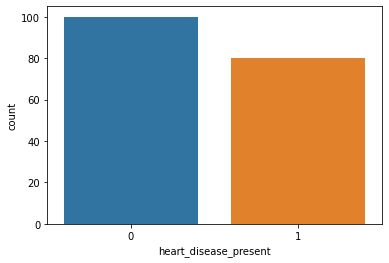

In [8]:
#df_o['heart_disease_present'].value_counts()
sns.countplot(df_o['heart_disease_present'])

### Step 5: EDA

### Purpose: Analyzing of categorical features versus the output

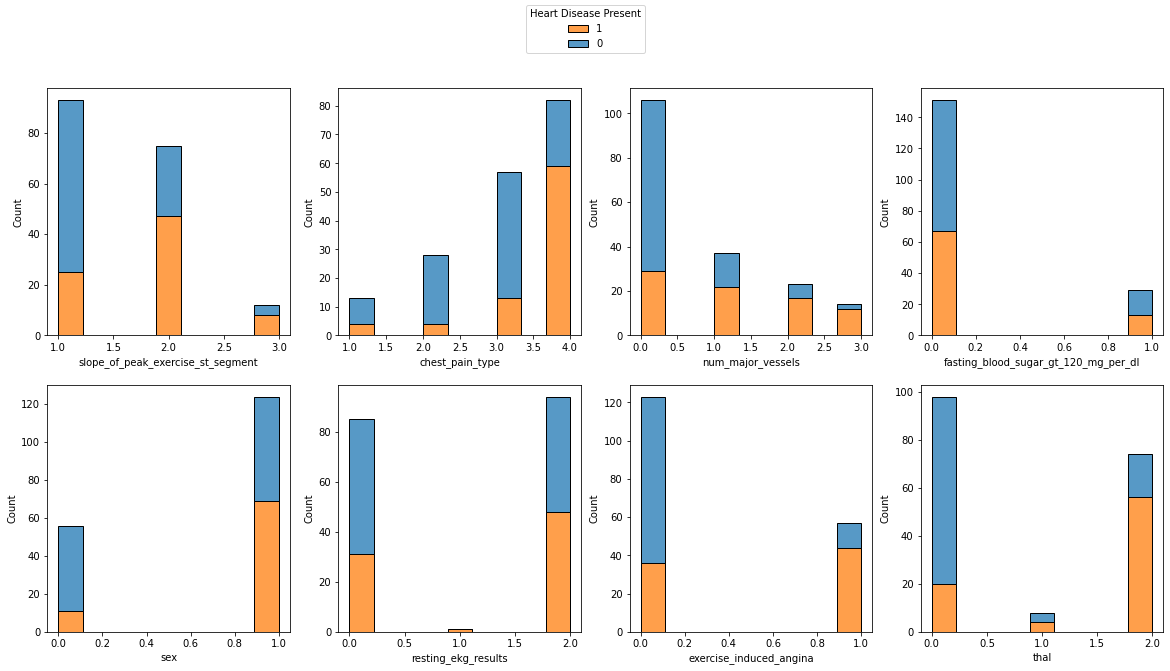

In [9]:
fig, ax = plt.subplots(2,4, figsize = (20,10))

sns.histplot(data = df_o, x = df_o['slope_of_peak_exercise_st_segment'], ax = ax[0,0],hue="heart_disease_present", multiple= "stack", legend = False)
sns.histplot(data = df_o, x = df_o['chest_pain_type'], ax = ax[0,1],hue="heart_disease_present", multiple= "stack", legend = False)
sns.histplot(data = df_o, x = df_o['num_major_vessels'], ax = ax[0,2],hue="heart_disease_present", multiple= "stack", legend = False)
sns.histplot(data = df_o, x = df_o['fasting_blood_sugar_gt_120_mg_per_dl'], ax = ax[0,3],hue="heart_disease_present", multiple= "stack", legend = False)
sns.histplot(data = df_o, x = df_o['sex'], ax = ax[1,0],hue="heart_disease_present", multiple= "stack", legend = False)
sns.histplot(data = df_o, x = df_o['resting_ekg_results'], ax = ax[1,1],hue="heart_disease_present", multiple= "stack", legend = False)
sns.histplot(data = df_o, x = df_o['exercise_induced_angina'], ax = ax[1,2],hue="heart_disease_present", multiple= "stack", legend = False)
sns.histplot(data = df_o, x = df_o['thal'], ax = ax[1,3],hue="heart_disease_present", multiple= "stack", legend = False)
fig.legend(title='Heart Disease Present', labels=[1,0], loc='upper center')


In [10]:
#more men are having heart disease problems
#reversible defects have the higher chance of getting heart disease
#The higher the chest pain (values from 1 to 4) have the highest chance of heart disease present
#lower value of fasting blood sugar have higher rates of getting heart disease
#Based on the ratio of the bar in slope of peak exercise st segment, 2 and 3 values have higher chances of heart disease

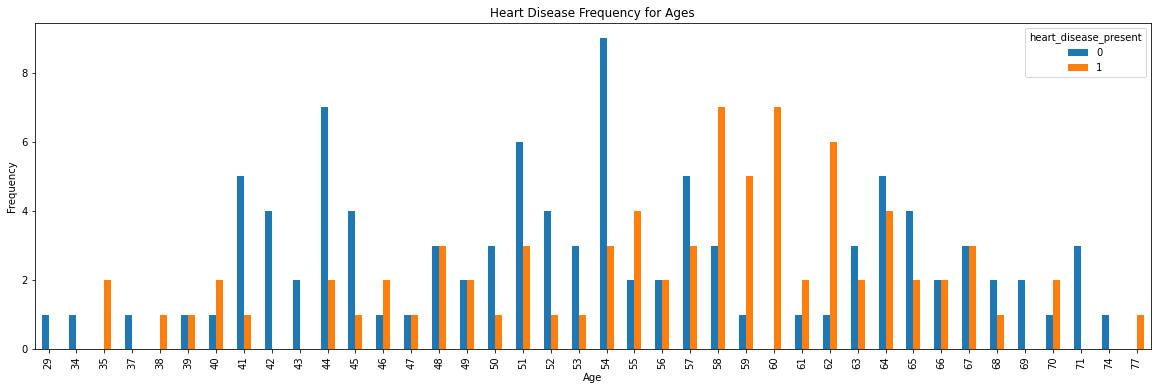

In [11]:
pd.crosstab(df_o['age'],df_o['heart_disease_present']).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Purpose:Analyzing the Distributions of continuous feature

<AxesSubplot:xlabel='max_heart_rate_achieved', ylabel='Density'>

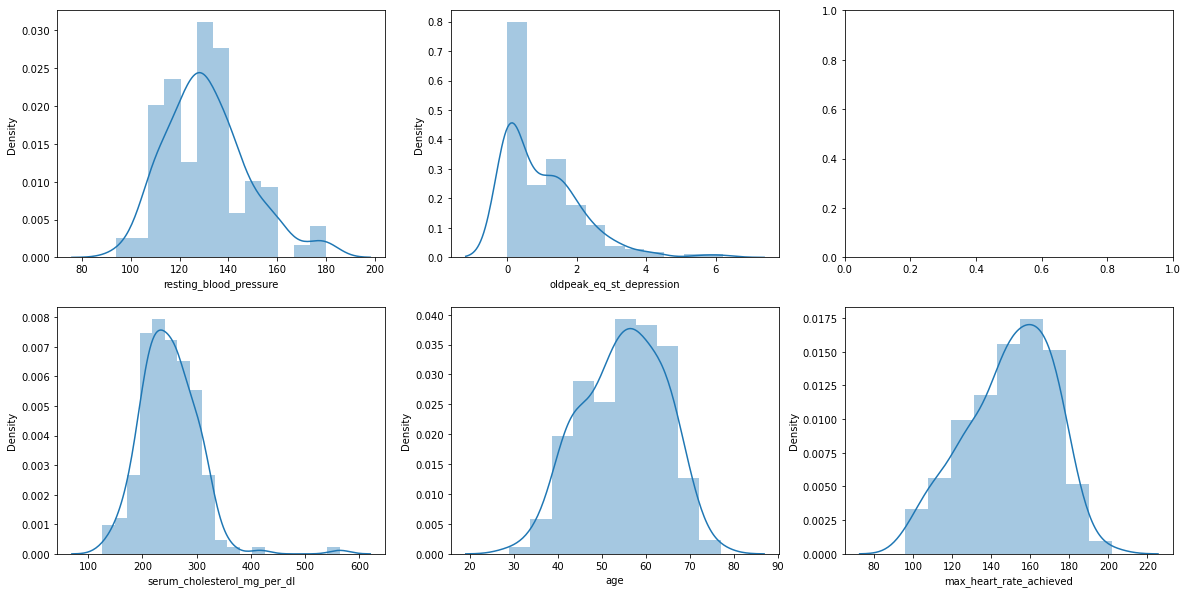

In [12]:
#For Distrbution
fig, ax = plt.subplots(2,3, figsize = (20,10))
sns.distplot(df_o['resting_blood_pressure'], ax = ax[0,0])
sns.distplot(df_o['serum_cholesterol_mg_per_dl'], ax = ax[1,0])
sns.distplot(df_o['oldpeak_eq_st_depression'], ax = ax[0,1])
sns.distplot(df_o['age'], ax = ax[1,1])
sns.distplot(df_o['max_heart_rate_achieved'], ax = ax[1,2])


In [13]:
import matplotlib.patches as mpatches
pop_a = mpatches.Patch(color='blue', label='0')
pop_b = mpatches.Patch(color='red', label='1')

### Purpose: Insight Gathering 
* To understand correlation between features and with heart disease present or not

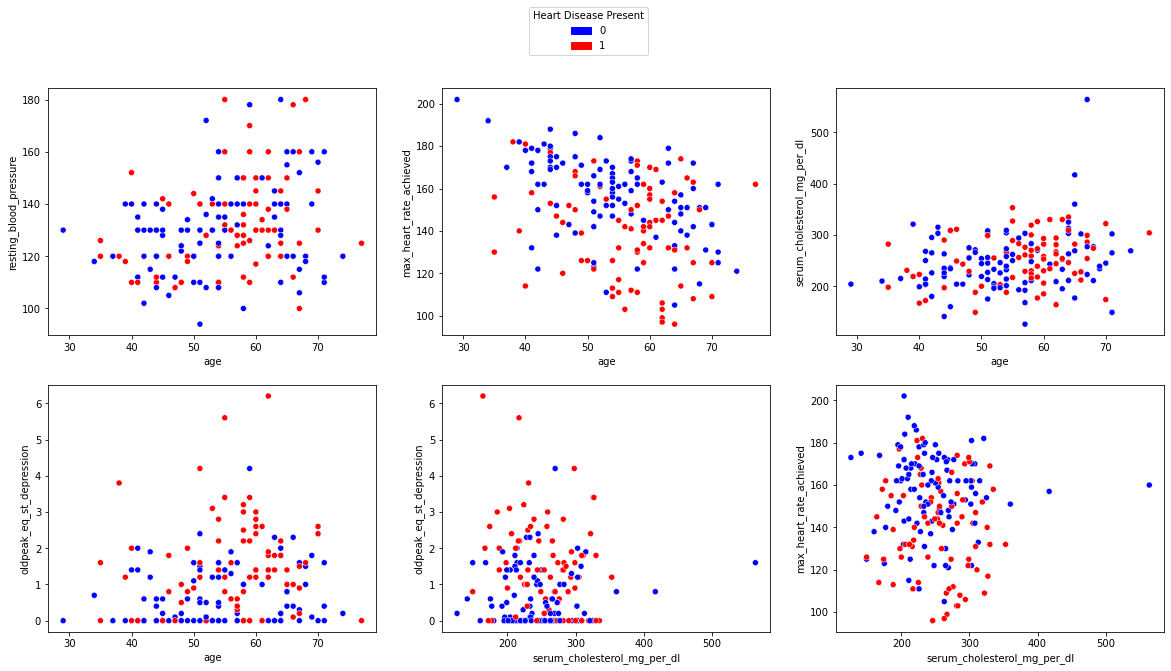

In [14]:
fig, ax = plt.subplots(2,3, figsize = (20,10))
sns.scatterplot(data = df_o, x = df_o['age'] ,y = df_o['resting_blood_pressure'], ax = ax[0,0], hue = df_o['heart_disease_present'], palette = ['blue', 'red'] ,legend = False)
sns.scatterplot(data = df_o, x = df_o['age'] ,y = df_o['max_heart_rate_achieved'], ax = ax[0,1], hue = df_o['heart_disease_present'], palette = ['blue', 'red'],legend = False)
sns.scatterplot(data = df_o, x = df_o['age'] ,y = df_o['serum_cholesterol_mg_per_dl'], ax = ax[0,2], hue = df_o['heart_disease_present'], palette = ['blue', 'red'],legend = False)
sns.scatterplot(data = df_o, x = df_o['age'] ,y = df_o['oldpeak_eq_st_depression'], ax = ax[1,0], hue = df_o['heart_disease_present'], palette = ['blue', 'red'],legend = False)
sns.scatterplot(data = df_o, x = df_o['serum_cholesterol_mg_per_dl'] ,y = df_o['oldpeak_eq_st_depression'], ax = ax[1,1], hue = df_o['heart_disease_present'], palette = ['blue', 'red'],legend = False)
sns.scatterplot(data = df_o, x = df_o['serum_cholesterol_mg_per_dl'] ,y = df_o['max_heart_rate_achieved'], ax = ax[1,2], hue = df_o['heart_disease_present'], palette = ['blue', 'red'],legend = False)
#fig.legend(title='Heart Disease Present', loc='upper center', labels = [0,1])
handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(bbox_to_anchor=(0.5, 1),
           title='Heart Disease Present',loc='upper center', handles = [pop_a, pop_b], labels = [0,1])


### Purpose: Identifying of outliers and understand the variations of the dataset

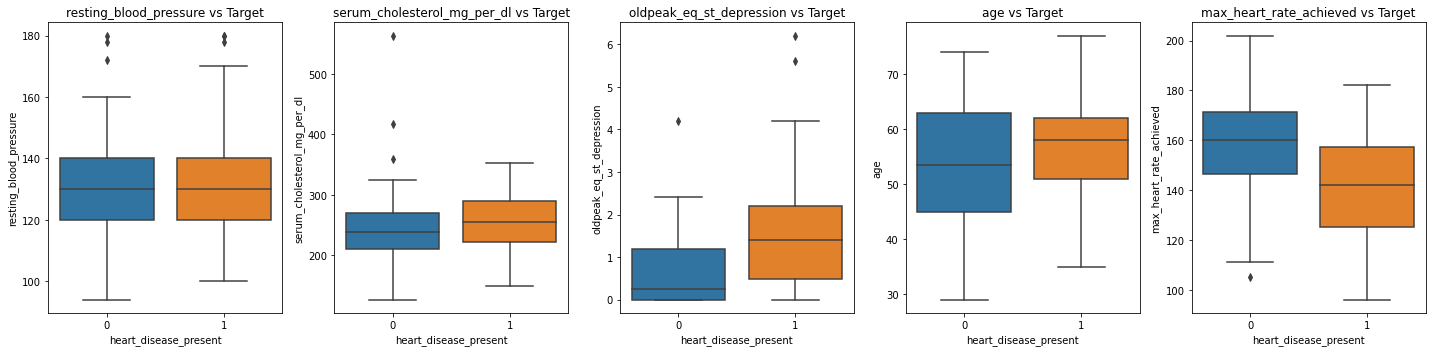

In [15]:
#ax = sns.boxplot(x="day", y="total_bill", data=tips)
fig, ax = plt.subplots(ncols=5, figsize = (20,5))
#sns.boxplot(x = df_o['heart_disease_present'], y = df_o['resting_blood_pressure'], data = df_o)

sns.boxplot(x = df_o['heart_disease_present'],y = df_o['resting_blood_pressure'], ax = ax[0])
ax[0].set_title('resting_blood_pressure vs Target')
sns.boxplot(x = df_o['heart_disease_present'],y = df_o['serum_cholesterol_mg_per_dl'], ax = ax[1])
ax[1].set_title('serum_cholesterol_mg_per_dl vs Target')
sns.boxplot(x = df_o['heart_disease_present'],y = df_o['oldpeak_eq_st_depression'], ax = ax[2])
ax[2].set_title('oldpeak_eq_st_depression vs Target')
sns.boxplot(x = df_o['heart_disease_present'],y = df_o['age'], ax = ax[3])
ax[3].set_title('age vs Target')
sns.boxplot(x = df_o['heart_disease_present'],y = df_o['max_heart_rate_achieved'], ax = ax[4])
ax[4].set_title('max_heart_rate_achieved vs Target')
plt.tight_layout()

#### Acquire training and testing data
* with Application of SMOTE over training data only

In [17]:
X= df_o.iloc[:,1:-1]
y = df_o.iloc[:,-1:]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from imblearn.over_sampling import SMOTE
oversampling =  SMOTE(random_state=4)
X_train_over , y_train_over  = oversampling.fit_resample(X_train, y_train)

In [18]:
print(y_train_over.value_counts())
print(y_test.value_counts())

heart_disease_present
0                        76
1                        76
dtype: int64
heart_disease_present
0                        24
1                        12
dtype: int64


### Step 6-7-8: Model Selection and Building, 
* **Feature Selection using RFE**
* **Hyperparameters Tuning using RandomizedSearch CV**

### Model building (With Outliers)
* Logistic Regression
* Random Forest
* Gradient Boosting
* XGB
* KNN - performs poorly, so the team decided to remove 
* SVM - took too much time to train/fit
* Stacking Classifier 

### Logistic Regression

In [19]:

 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, recall_score,f1_score,precision_score
from sklearn.feature_selection import RFE

lr_model = LogisticRegression(C=0.1, solver='liblinear', random_state= 0)

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
parameters = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'sag'],
              'penalty':['none', 'l1', 'l2', 'elasticnet'],
              'C' : [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]
             }  


lr_grid = RandomizedSearchCV(lr_model,parameters,cv=5)
lr_grid.fit(X_train_over,y_train_over)
print(lr_grid.best_estimator_)
print(lr_grid.best_score_)


LogisticRegression(C=50, penalty='l1', random_state=0, solver='liblinear')
0.8161290322580645


In [83]:
lr_rfe = RFE(lr_model, n_features_to_select = 10)
fit = lr_rfe.fit(X_train_over, y_train_over)
print("Feature Ranking: %s" % (fit.ranking_))



Feature Ranking: [1 1 4 1 1 1 1 3 1 1 2 1 1]


In [21]:
for i in range(2, 14):
    lr_rfe = RFE(lr_model, i)
    fit = lr_rfe.fit(X_train_over, y_train_over)
    X_train_selected = lr_rfe.transform(X_train_over)
    X_test_selected = lr_rfe.transform(X_test)
    lr_model.fit(X_train_selected,y_train_over)
    preds_lr1 = lr_model.predict(X_train_selected)
    print("Number of features selected:", i)
    print('The Accuracy for Training Phase:', accuracy_score(y_train_over, preds_lr1))
    print('The Average Precision for Training Phase:', precision_score(y_train_over, preds_lr1))
    print('The Average Recall for Training Phase:',recall_score(y_train_over, preds_lr1))
    print('The Average F1 for Training Phase:',f1_score(y_train_over, preds_lr1))

Number of features selected: 2
The Accuracy for Training Phase: 0.7894736842105263
The Average Precision for Training Phase: 0.7619047619047619
The Average Recall for Training Phase: 0.8421052631578947
The Average F1 for Training Phase: 0.8
Number of features selected: 3
The Accuracy for Training Phase: 0.7960526315789473
The Average Precision for Training Phase: 0.7586206896551724
The Average Recall for Training Phase: 0.868421052631579
The Average F1 for Training Phase: 0.8098159509202454
Number of features selected: 4
The Accuracy for Training Phase: 0.7960526315789473
The Average Precision for Training Phase: 0.7647058823529411
The Average Recall for Training Phase: 0.8552631578947368
The Average F1 for Training Phase: 0.8074534161490684
Number of features selected: 5
The Accuracy for Training Phase: 0.7960526315789473
The Average Precision for Training Phase: 0.7647058823529411
The Average Recall for Training Phase: 0.8552631578947368
The Average F1 for Training Phase: 0.807453416

In [22]:
lr_rfe = RFE(lr_model, n_features_to_select = 10)
fit = lr_rfe.fit(X_train_over, y_train_over)
X_test_selected = lr_rfe.transform(X_test)
X_train_selected = lr_rfe.transform(X_train_over)
X_selected = lr_rfe.transform(X)
lr_model.fit(X_train_selected,y_train_over)


preds_lr = lr_model.predict(X_test_selected)

print('TRAINING METRICS')
print('The Accuracy for Training Phase:', accuracy_score(y_train_over,lr_model.predict(X_train_selected)))
print('The Precision for Training Phase:', precision_score(y_train_over, lr_model.predict(X_train_selected)))
print('The Recall for Training Phase:',recall_score(y_train_over, lr_model.predict(X_train_selected)))
print('The F1 for Training Phase:',f1_score(y_train_over, lr_model.predict(X_train_selected)))

print('TESTING METRICS')
print('The Accuracy for Testing Phase:', accuracy_score(y_test, preds_lr))
print('The Average Precision for Testing Phase:', precision_score(y_test, preds_lr))
print('The Average Recall for Testing Phase:',recall_score(y_test, preds_lr))
print('The Average F1 for Testing Phase:',f1_score(y_test, preds_lr))
pd.crosstab(y_test.values.ravel(),preds_lr)

TRAINING METRICS
The Accuracy for Training Phase: 0.8552631578947368
The Precision for Training Phase: 0.875
The Recall for Training Phase: 0.8289473684210527
The F1 for Training Phase: 0.8513513513513513
TESTING METRICS
The Accuracy for Testing Phase: 0.8611111111111112
The Average Precision for Testing Phase: 0.7333333333333333
The Average Recall for Testing Phase: 0.9166666666666666
The Average F1 for Testing Phase: 0.8148148148148148


col_0,0,1
row_0,,
0,20,4
1,1,11


In [23]:
#For Generalization

lr_rfe = RFE(lr_model, n_features_to_select = 10)
fit = lr_rfe.fit(X_train_over, y_train_over)
X_test_selected1 = lr_rfe.transform(X_test)
X_train_selected1 = lr_rfe.transform(X_train_over)
X_selected1 = lr_rfe.transform(X)
lr_model.fit(X_train_selected1,y_train_over)
scores1 = cross_validate(lr_model,X_selected1,y,cv=3,scoring=['accuracy','f1','precision', 'recall'], return_train_score=True)
print('TESTING METRICS')
print('The Average Accuracy for Testing Phase:',scores1['test_accuracy'].mean())
print('The Accuracy STD for Testing Phase:',scores1['test_accuracy'].std())
print('The Average Precision for Testing Phase:',scores1['test_precision'].mean())
print('The Precision STD for Testing Phase:',scores1['test_precision'].std())
print('The Average Recall for Testing Phase:',scores1['test_recall'].mean())
print('The Recall STD for Testing Phase:',scores1['test_recall'].std())
print('The Average F1 for Testing Phase:',scores1['test_f1'].mean())
print('The F1 STD for Testing Phase:',scores1['test_f1'].std())
print(" ")

TESTING METRICS
The Average Accuracy for Testing Phase: 0.8555555555555556
The Accuracy STD for Testing Phase: 0.034246744460938776
The Average Precision for Testing Phase: 0.8640618640618641
The Precision STD for Testing Phase: 0.01811951916121453
The Average Recall for Testing Phase: 0.7986704653371319
The Recall STD for Testing Phase: 0.08106179423693559
The Average F1 for Testing Phase: 0.8283450049808941
The F1 STD for Testing Phase: 0.05020348071654803
 


In [24]:
print('The Average Accuracy for Testing Phase:',scores1['train_f1'].mean())

The Average Accuracy for Testing Phase: 0.8297909390142401


## RandomForestClassifier

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(max_depth=4,
                       n_estimators=200,random_state= 0)

parameters = {'max_depth':[2,4,6,8],
              'n_estimators':[30,40,50,100,200],
              'max_features' : [7,8,9,10,11,12,13],
              'oob_score': ['True', 'False'],
              'bootstrap':['True', 'False'],
             }  

#grid = GridSearchCV(rf_model,parameters,cv=5,verbose=2)
rf_grid = RandomizedSearchCV(rf_model,parameters,cv=5)
rf_grid.fit(X_train_over,y_train_over)
print(rf_grid.best_estimator_)
print(rf_grid.best_score_)

RandomForestClassifier(bootstrap='True', max_depth=8, max_features=7,
                       n_estimators=200, oob_score='True', random_state=0)
0.8161290322580645


In [26]:
rf_rfe = RFE(rf_model, n_features_to_select = 8)
fit = rf_rfe.fit(X_train_over, y_train_over)
print("Feature Ranking: %s" % (fit.ranking_))
#'slope_of_peak_exercise_st_segment','thal','resting_blood_pressure','chest_pain_type','num_major_vessels','fasting_blood_sugar_gt_120_mg_per_dl','resting_ekg_results','serum_cholesterol_mg_per_dl','oldpeak_eq_st_depression','sex','age','max_heart_rate_achieved','exercise_induced_angina'


Feature Ranking: [4 1 1 1 1 6 5 1 1 3 1 1 2]


In [27]:
for i in range(2, 14):
    rf_rfe = RFE(rf_model, i)
    fit = rf_rfe.fit(X_train_over, y_train_over)
    X_train_selected = rf_rfe.transform(X_train_over)
    X_test_selected = rf_rfe.transform(X_test)
    rf_model.fit(X_train_selected,y_train_over)
    preds_rf1 = rf_model.predict(X_train_selected)
    print("Number of features selected:", i)
    print('The Accuracy for Training Phase:', accuracy_score(y_train_over, preds_rf1))
    print('The Average Precision for Training Phase:', precision_score(y_train_over, preds_rf1))
    print('The Average Recall for Training Phase:',recall_score(y_train_over, preds_rf1))
    print('The Average F1 for Training Phase:',f1_score(y_train_over, preds_rf1))

Number of features selected: 2
The Accuracy for Training Phase: 0.7960526315789473
The Average Precision for Training Phase: 0.8169014084507042
The Average Recall for Training Phase: 0.7631578947368421
The Average F1 for Training Phase: 0.7891156462585034
Number of features selected: 3
The Accuracy for Training Phase: 0.8421052631578947
The Average Precision for Training Phase: 0.8939393939393939
The Average Recall for Training Phase: 0.7763157894736842
The Average F1 for Training Phase: 0.8309859154929577
Number of features selected: 4
The Accuracy for Training Phase: 0.8618421052631579
The Average Precision for Training Phase: 0.9104477611940298
The Average Recall for Training Phase: 0.8026315789473685
The Average F1 for Training Phase: 0.8531468531468532
Number of features selected: 5
The Accuracy for Training Phase: 0.9144736842105263
The Average Precision for Training Phase: 0.9565217391304348
The Average Recall for Training Phase: 0.868421052631579
The Average F1 for Training Pha

In [28]:
rf_rfe = RFE(rf_model, n_features_to_select =8)
fit = rf_rfe.fit(X_train_over, y_train_over)
X_test_selected = rf_rfe.transform(X_test)
X_train_selected = rf_rfe.transform(X_train_over)
X_selected = rf_rfe.transform(X)
rf_model.fit(X_train_selected,y_train_over)

preds_rf = rf_model.predict(X_test_selected)

print('TRAINING METRICS')
print('The Accuracy for Training Phase:', accuracy_score(y_train_over, rf_model.predict(X_train_selected)))
print('The Precision for Training Phase:', precision_score(y_train_over, rf_model.predict(X_train_selected)))
print('The Recall for Training Phase:',recall_score(y_train_over, rf_model.predict(X_train_selected)))
print('The F1 for Training Phase:',f1_score(y_train_over, rf_model.predict(X_train_selected)))

print('TESTING METRICS')
print('The Accuracy for Testing Phase:', accuracy_score(y_test, preds_rf))
print('The Average Precision for Testing Phase:', precision_score(y_test, preds_rf))
print('The Average Recall for Testing Phase:',recall_score(y_test, preds_rf))
print('The Average F1 for Testing Phase:',f1_score(y_test, preds_rf))
pd.crosstab(y_test.values.ravel(),preds_rf)

TRAINING METRICS
The Accuracy for Training Phase: 0.9407894736842105
The Precision for Training Phase: 0.958904109589041
The Recall for Training Phase: 0.9210526315789473
The F1 for Training Phase: 0.9395973154362416
TESTING METRICS
The Accuracy for Testing Phase: 0.75
The Average Precision for Testing Phase: 0.5882352941176471
The Average Recall for Testing Phase: 0.8333333333333334
The Average F1 for Testing Phase: 0.6896551724137931


col_0,0,1
row_0,,
0,17,7
1,2,10


In [29]:
#For Generalization
rf_rfe = RFE(rf_model, n_features_to_select = 8)
fit = rf_rfe.fit(X_train_over, y_train_over)
X_test_selected2 = rf_rfe.transform(X_test)
X_train_selected2 = rf_rfe.transform(X_train_over)
X_selected2 = rf_rfe.transform(X)
rf_model.fit(X_train_selected2,y_train_over)
scores2 = cross_validate(rf_model,X_selected2,y,cv=3,scoring=['accuracy','f1','precision', 'recall'], return_train_score=True)
print('TESTING METRICS')
print('The Average Accuracy for Testing Phase:',scores2['test_accuracy'].mean())
print('The Accuracy STD for Testing Phase:',scores2['test_accuracy'].std())
print('The Average Precision for Testing Phase:',scores2['test_precision'].mean())
print('The Precision STD for Testing Phase:',scores2['test_precision'].std())
print('The Average Recall for Testing Phase:',scores2['test_recall'].mean())
print('The Recall STD for Testing Phase:',scores2['test_recall'].std())
print('The Average F1 for Testing Phase:',scores2['test_f1'].mean())
print('The F1 STD for Testing Phase:',scores2['test_f1'].std())
print(" ")

TESTING METRICS
The Average Accuracy for Testing Phase: 0.7888888888888889
The Accuracy STD for Testing Phase: 0.028327886186626582
The Average Precision for Testing Phase: 0.7748668400842313
The Precision STD for Testing Phase: 0.02806584843914057
The Average Recall for Testing Phase: 0.7364672364672366
The Recall STD for Testing Phase: 0.058421927790341534
The Average F1 for Testing Phase: 0.7547027196622883
The F1 STD for Testing Phase: 0.04342514744592553
 


## GradientBoostingClassifier

In [30]:

from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(learning_rate=0.01, max_depth=4,
                           max_features='sqrt', min_samples_leaf=10,
                            random_state=0,n_estimators=200, loss = 'deviance')



parameters = {'max_depth':[2,4],
              'n_estimators':[40,50, 100, 200],
              'max_features' : ['auto', 'sqrt'],
              'min_samples_leaf' : [2,4,6],
              'learning_rate': [1,0.1, 0.01,0.001]
             }  

gb_grid = RandomizedSearchCV(gb_model,parameters,cv=5)
gb_grid.fit(X_train_over,y_train_over)
print(gb_grid.best_estimator_)
print(gb_grid.best_score_)


GradientBoostingClassifier(learning_rate=0.001, max_depth=4,
                           max_features='sqrt', min_samples_leaf=2,
                           n_estimators=200, random_state=0)
0.8094623655913977


In [31]:
gb_rfe = RFE(gb_model, n_features_to_select = 7)
fit = gb_rfe.fit(X_train_over, y_train_over)
print("Feature Ranking: %s" % (fit.ranking_))
#'slope_of_peak_exercise_st_segment','thal','resting_blood_pressure','chest_pain_type','num_major_vessels','fasting_blood_sugar_gt_120_mg_per_dl','resting_ekg_results','serum_cholesterol_mg_per_dl','oldpeak_eq_st_depression','sex','age','max_heart_rate_achieved','exercise_induced_angina'


Feature Ranking: [4 1 5 1 1 7 6 2 1 3 1 1 1]


In [32]:
for i in range(2, 14):
    gb_rfe = RFE(gb_model, i)
    fit = gb_rfe.fit(X_train_over, y_train_over)
    X_train_selected = gb_rfe.transform(X_train_over)
    X_test_selected = gb_rfe.transform(X_test)
    gb_model.fit(X_train_selected,y_train_over)
    preds_gb = gb_model.predict(X_train_selected)
    print("Number of features selected:", i)
    print('The Accuracy for Training Phase:', accuracy_score(y_train_over, preds_gb))
    print('The Average Precision for Training Phase:', precision_score(y_train_over, preds_gb))
    print('The Average Recall for Training Phase:',recall_score(y_train_over, preds_gb))
    print('The Average F1 for Training Phase:',f1_score(y_train_over, preds_gb))

Number of features selected: 2
The Accuracy for Training Phase: 0.756578947368421
The Average Precision for Training Phase: 0.782608695652174
The Average Recall for Training Phase: 0.7105263157894737
The Average F1 for Training Phase: 0.7448275862068965
Number of features selected: 3
The Accuracy for Training Phase: 0.8289473684210527
The Average Precision for Training Phase: 0.8472222222222222
The Average Recall for Training Phase: 0.8026315789473685
The Average F1 for Training Phase: 0.8243243243243243
Number of features selected: 4
The Accuracy for Training Phase: 0.8486842105263158
The Average Precision for Training Phase: 0.8955223880597015
The Average Recall for Training Phase: 0.7894736842105263
The Average F1 for Training Phase: 0.8391608391608391
Number of features selected: 5
The Accuracy for Training Phase: 0.9144736842105263
The Average Precision for Training Phase: 0.92
The Average Recall for Training Phase: 0.9078947368421053
The Average F1 for Training Phase: 0.913907284

In [33]:
gb_rfe = RFE(gb_model, n_features_to_select = 7)
fit = gb_rfe.fit(X_train_over, y_train_over)
X_test_selected = gb_rfe.transform(X_test)
X_train_selected = gb_rfe.transform(X_train_over)
X_selected = gb_rfe.transform(X)

gb_model.fit(X_train_selected,y_train_over)
preds_gb = gb_model.predict(X_test_selected)

print('TRAINING METRICS')
print('The Accuracy for Training Phase:', accuracy_score(y_train_over, gb_model.predict(X_train_selected)))
print('The Precision for Training Phase:', precision_score(y_train_over, gb_model.predict(X_train_selected)))
print('The Recall for Training Phase:',recall_score(y_train_over, gb_model.predict(X_train_selected)))
print('The F1 for Training Phase:',f1_score(y_train_over, gb_model.predict(X_train_selected)))

print('TESTING METRICS')
print('The Accuracy for Testing Phase:', accuracy_score(y_test, preds_gb))
print('The Average Precision for Testing Phase:', precision_score(y_test, preds_gb))
print('The Average Recall for Testing Phase:',recall_score(y_test, preds_gb))
print('The Average F1 for Testing Phase:',f1_score(y_test, preds_gb))
pd.crosstab(y_test.values.ravel(),preds_gb)

TRAINING METRICS
The Accuracy for Training Phase: 0.9144736842105263
The Precision for Training Phase: 0.9436619718309859
The Recall for Training Phase: 0.881578947368421
The F1 for Training Phase: 0.9115646258503401
TESTING METRICS
The Accuracy for Testing Phase: 0.75
The Average Precision for Testing Phase: 0.5882352941176471
The Average Recall for Testing Phase: 0.8333333333333334
The Average F1 for Testing Phase: 0.6896551724137931


col_0,0,1
row_0,,
0,17,7
1,2,10


In [34]:
gb_rfe = RFE(gb_model, n_features_to_select = 7)
fit = gb_rfe.fit(X_train_over, y_train_over)
X_test_selected3 = gb_rfe.transform(X_test)
X_train_selected3 = gb_rfe.transform(X_train_over)
X_selected3 = gb_rfe.transform(X)

gb_model.fit(X_train_selected3,y_train_over)
preds_gb = gb_model.predict(X_test_selected3)
scores3 = cross_validate(gb_model,X_selected3,y,cv=3,scoring=['accuracy','f1','precision', 'recall'],return_train_score= True)
print('TESTING METRICS')
print('The Average Accuracy for Testing Phase:',scores3['test_accuracy'].mean())
print('The Accuracy STD for Testing Phase:',scores3['test_accuracy'].std())
print('The Average Precision for Testing Phase:',scores3['test_precision'].mean())
print('The Precision STD for Testing Phase:',scores3['test_precision'].std())
print('The Average Recall for Testing Phase:',scores3['test_recall'].mean())
print('The Recall STD for Testing Phase:',scores3['test_recall'].std())
print('The Average F1 for Testing Phase:',scores3['test_f1'].mean())
print('The F1 STD for Testing Phase:',scores3['test_f1'].std())
print(" ")

TESTING METRICS
The Average Accuracy for Testing Phase: 0.8055555555555557
The Accuracy STD for Testing Phase: 0.03424674446093873
The Average Precision for Testing Phase: 0.8196969696969697
The Precision STD for Testing Phase: 0.0664251824750999
The Average Recall for Testing Phase: 0.7245963912630579
The Recall STD for Testing Phase: 0.022831557987030012
The Average F1 for Testing Phase: 0.7685190999476713
The F1 STD for Testing Phase: 0.03932836109666343
 


## XGBClassifier

In [35]:
import xgboost as xgb
from xgboost import XGBClassifier
xgb_model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=1, max_delta_step=0,
              max_depth=2, min_child_weight=3, 
              monotone_constraints='()', n_estimators=200, n_jobs=16,
              num_parallel_tree=1, random_state=0, reg_alpha=.6, reg_lambda=.6,
              scale_pos_weight=1, subsample=0.7, tree_method='exact',
              validate_parameters=1, verbosity=None)


parameters = {'learning_rate': [0.01, 0.1],
              'max_depth':[2,4,6,8],
              'min_child_weight': [1, 3, 5],
              'subsample': [0.5, 0.7],
              'colsample_bytree': [0.5, 0.7],
              'n_estimators' : [30,40,50,100,200],
              'reg_alpha':[0.5,0.6,0.7,0.8,1],
              'reg_lambda':[0.5,0.6,0.7,0.8,1],
              'objective': ['binary:logistic']
             }  

xgb_grid = RandomizedSearchCV(xgb_model,parameters,cv=5)
xgb_grid.fit(X_train_over,y_train_over)
print(xgb_grid.best_estimator_)
print(xgb_grid.best_score_)




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=2, min_child_weight=3, missing=nan,
              monotone_constraints='()', n_estimators=30, n_jobs=16,
              num_parallel_tree=1, random_state=0, reg_alpha=0.5,
              reg_lambda=0.8, scale_pos_weight=1, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None)
0.8027956989247311


In [36]:
xgb_rfe = RFE(xgb_model, n_features_to_select = 5)
fit = xgb_rfe.fit(X_train_over, y_train_over)
print("Feature Ranking: %s" % (fit.ranking_))
#'slope_of_peak_exercise_st_segment','thal','resting_blood_pressure','chest_pain_type','num_major_vessels','fasting_blood_sugar_gt_120_mg_per_dl','resting_ekg_results','serum_cholesterol_mg_per_dl','oldpeak_eq_st_depression','sex','age','max_heart_rate_achieved','exercise_induced_angina'


Feature Ranking: [6 1 3 1 1 9 7 4 5 1 1 2 8]


In [37]:
for i in range(2, 14):
    xgb_rfe = RFE(xgb_model, i)
    fit = xgb_rfe.fit(X_train_over, y_train_over)
    X_train_selected = xgb_rfe.transform(X_train_over)
    X_test_selected = xgb_rfe.transform(X_test)
    xgb_model.fit(X_train_selected,y_train_over)
    preds_xgb = xgb_model.predict(X_train_selected)
    print("Number of features selected:", i)
    print('The Accuracy for Testing Phase:', accuracy_score(y_train_over, preds_xgb))
    print('The Average Precision for Testing Phase:', precision_score(y_train_over, preds_xgb))
    print('The Average Recall for Testing Phase:',recall_score(y_train_over, preds_xgb))
    print('The Average F1 for Testing Phase:',f1_score(y_train_over, preds_xgb))

Number of features selected: 2
The Accuracy for Testing Phase: 0.756578947368421
The Average Precision for Testing Phase: 0.782608695652174
The Average Recall for Testing Phase: 0.7105263157894737
The Average F1 for Testing Phase: 0.7448275862068965
Number of features selected: 3
The Accuracy for Testing Phase: 0.8289473684210527
The Average Precision for Testing Phase: 0.8125
The Average Recall for Testing Phase: 0.8552631578947368
The Average F1 for Testing Phase: 0.8333333333333334
Number of features selected: 4
The Accuracy for Testing Phase: 0.8552631578947368
The Average Precision for Testing Phase: 0.8461538461538461
The Average Recall for Testing Phase: 0.868421052631579
The Average F1 for Testing Phase: 0.8571428571428572
Number of features selected: 5
The Accuracy for Testing Phase: 0.9210526315789473
The Average Precision for Testing Phase: 0.9
The Average Recall for Testing Phase: 0.9473684210526315
The Average F1 for Testing Phase: 0.9230769230769231
Number of features sel

In [38]:
xgb_rfe = RFE(xgb_model, n_features_to_select = 5)
fit = xgb_rfe.fit(X_train_over, y_train_over)
X_test_selected1 = xgb_rfe.transform(X_test)
X_train_selected1 = xgb_rfe.transform(X_train_over)
X_selected = xgb_rfe.transform(X)

xgb_model.fit(X_train_selected1,y_train_over)

preds_xgb = xgb_model.predict(X_test_selected1)

print('TRAINING METRICS')
print('The Accuracy for Training Phase:', accuracy_score(y_train_over, xgb_model.predict(X_train_selected1)))
print('The Precision for Training Phase:', precision_score(y_train_over, xgb_model.predict(X_train_selected1)))
print('The Recall for Training Phase:',recall_score(y_train_over, xgb_model.predict(X_train_selected1)))
print('The F1 for Training Phase:',f1_score(y_train_over, xgb_model.predict(X_train_selected1)))

print('TESTING METRICS')
print('The Accuracy for Testing Phase:', accuracy_score(y_test, preds_xgb))
print('The Average Precision for Testing Phase:', precision_score(y_test, preds_xgb))
print('The Average Recall for Testing Phase:',recall_score(y_test, preds_xgb))
print('The Average F1 for Testing Phase:',f1_score(y_test, preds_xgb))
pd.crosstab(y_test.values.ravel(),preds_xgb)

TRAINING METRICS
The Accuracy for Training Phase: 0.9210526315789473
The Precision for Training Phase: 0.9
The Recall for Training Phase: 0.9473684210526315
The F1 for Training Phase: 0.9230769230769231
TESTING METRICS
The Accuracy for Testing Phase: 0.7777777777777778
The Average Precision for Testing Phase: 0.6111111111111112
The Average Recall for Testing Phase: 0.9166666666666666
The Average F1 for Testing Phase: 0.7333333333333334


col_0,0,1
row_0,,
0,17,7
1,1,11


In [39]:
xgb_rfe = RFE(xgb_model, n_features_to_select = 5)
fit = xgb_rfe.fit(X_train_over, y_train_over)
X_test_selected4 = xgb_rfe.transform(X_test)
X_train_selected4 = xgb_rfe.transform(X_train_over)
X_selected4 = xgb_rfe.transform(X)
scores4 = cross_validate(xgb_model,X_selected4,y,cv=3,scoring=['accuracy','f1','precision', 'recall'], return_train_score=True)
print('TESTING METRICS')
print('The Average Accuracy for Testing Phase:',scores4['test_accuracy'].mean())
print('The Accuracy STD for Testing Phase:',scores4['test_accuracy'].std())
print('The Average Precision for Testing Phase:',scores4['test_precision'].mean())
print('The Precision STD for Testing Phase:',scores4['test_precision'].std())
print('The Average Recall for Testing Phase:',scores4['test_recall'].mean())
print('The Recall STD for Testing Phase:',scores4['test_recall'].std())
print('The Average F1 for Testing Phase:',scores4['test_f1'].mean())
print('The F1 STD for Testing Phase:',scores4['test_f1'].std())
print(" ")

TESTING METRICS
The Average Accuracy for Testing Phase: 0.8055555555555555
The Accuracy STD for Testing Phase: 0.04374448818895451
The Average Precision for Testing Phase: 0.7671236942070275
The Precision STD for Testing Phase: 0.06011245572805279
The Average Recall for Testing Phase: 0.8114909781576447
The Recall STD for Testing Phase: 0.05707889496757509
The Average F1 for Testing Phase: 0.7874273665234117
The F1 STD for Testing Phase: 0.04973588524289483
 


### Stacking of Different Models


In [40]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [41]:
from mlxtend.classifier import StackingClassifier

stack_model = StackingClassifier(
    classifiers=[
        lr_model,
        rf_model
    ],
    use_probas=True,
    meta_classifier=lr_model,average_probas=True
)


### Purpose: Checking the features for each model created
* X_train_selected1 - Logistic Regression 
* X_train_selected2 - Random Forest
* X_train_selected3 - Gradient Boosting
* X_train_selected4 - XGB

In [42]:
print(X_train_selected1.shape)
print(X_train_selected2.shape)
print(X_train_selected3.shape)
print(X_train_selected4.shape)

(152, 5)
(152, 8)
(152, 7)
(152, 5)


### The features of Gradient Boosting works the best in training the Stacking Classifier

In [43]:
# model set 3 is best
stack_model.fit(X_train_selected3,y_train_over)

preds_stack = stack_model.predict(X_test_selected3)

print('TRAINING METRICS')
print('The Accuracy for Training Phase:', accuracy_score(y_train_over, stack_model.predict(X_train_selected3)))
print('The Precision for Training Phase:', precision_score(y_train_over, stack_model.predict(X_train_selected3)))
print('The Recall for Training Phase:',recall_score(y_train_over, stack_model.predict(X_train_selected3)))
print('The F1 for Training Phase:',f1_score(y_train_over, stack_model.predict(X_train_selected3)))

print('TESTING METRICS')
print('The Accuracy for Testing Phase:', accuracy_score(y_test, preds_stack))
print('The Average Precision for Testing Phase:', precision_score(y_test, preds_stack))
print('The Average Recall for Testing Phase:',recall_score(y_test, preds_stack))
print('The Average F1 for Testing Phase:',f1_score(y_test, preds_stack))
pd.crosstab(y_test.values.ravel(),preds_stack)

TRAINING METRICS
The Accuracy for Training Phase: 0.8881578947368421
The Precision for Training Phase: 0.9041095890410958
The Recall for Training Phase: 0.868421052631579
The F1 for Training Phase: 0.8859060402684564
TESTING METRICS
The Accuracy for Testing Phase: 0.8611111111111112
The Average Precision for Testing Phase: 0.7333333333333333
The Average Recall for Testing Phase: 0.9166666666666666
The Average F1 for Testing Phase: 0.8148148148148148


col_0,0,1
row_0,,
0,20,4
1,1,11


In [44]:
scores5 = cross_validate(stack_model,X_selected3,y,cv=3,scoring=['accuracy','f1','precision', 'recall'], return_train_score=True)
print('TESTING METRICS')
print('The Average Accuracy for Testing Phase:',scores5['test_accuracy'].mean())
print('The Accuracy STD for Testing Phase:',scores5['test_accuracy'].std())
print('The Average Precision for Testing Phase:',scores5['test_precision'].mean())
print('The Precision STD for Testing Phase:',scores5['test_precision'].std())
print('The Average Recall for Testing Phase:',scores5['test_recall'].mean())
print('The Recall STD for Testing Phase:',scores5['test_recall'].std())
print('The Average F1 for Testing Phase:',scores5['test_f1'].mean())
print('The F1 STD for Testing Phase:',scores5['test_f1'].std())
print(" ")

TESTING METRICS
The Average Accuracy for Testing Phase: 0.8277777777777778
The Accuracy STD for Testing Phase: 0.02078698548207743
The Average Precision for Testing Phase: 0.8648550724637681
The Precision STD for Testing Phase: 0.010735893036252945
The Average Recall for Testing Phase: 0.7241215574548908
The Recall STD for Testing Phase: 0.051941696753179396
The Average F1 for Testing Phase: 0.7875532821824383
The F1 STD for Testing Phase: 0.03556203422404901
 


In [45]:
print('TRAINING METRICS')
print('The Average Accuracy for Training Phase:',scores5['train_accuracy'].mean())
print('The Accuracy STD for Training Phase:',scores5['train_accuracy'].std())
print('The Average Precision for Training Phase:',scores5['train_precision'].mean())
print('The Precision STD for Training Phase:',scores5['train_precision'].std())
print('The Average Recall for Training Phase:',scores5['train_recall'].mean())
print('The Recall STD for Training Phase:',scores5['train_recall'].std())
print('The Average F1 for Training Phase:',scores5['train_f1'].mean())
print('The F1 STD for Training Phase:',scores5['train_f1'].std())
print(" ")

TRAINING METRICS
The Average Accuracy for Training Phase: 0.8916666666666666
The Accuracy STD for Training Phase: 0.024532669073132923
The Average Precision for Training Phase: 0.9483156028368794
The Precision STD for Training Phase: 0.008229892173954041
The Average Recall for Training Phase: 0.79979035639413
The Recall STD for Training Phase: 0.0589057497619586
The Average F1 for Training Phase: 0.8665190807505798
The F1 STD for Training Phase: 0.03560725854933353
 


## Part 2 (Without Outliers)

In [46]:
df = pd.read_csv('values.csv')
df

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


In [47]:
df['thal'][df['thal'] == 'normal'] = 0
df['thal'][df['thal'] == 'reversible_defect'] = 2
df['thal'][df['thal'] == 'fixed_defect'] = 1
df['thal'] = df['thal'].astype('int')

### Purpose: Checking of outliers

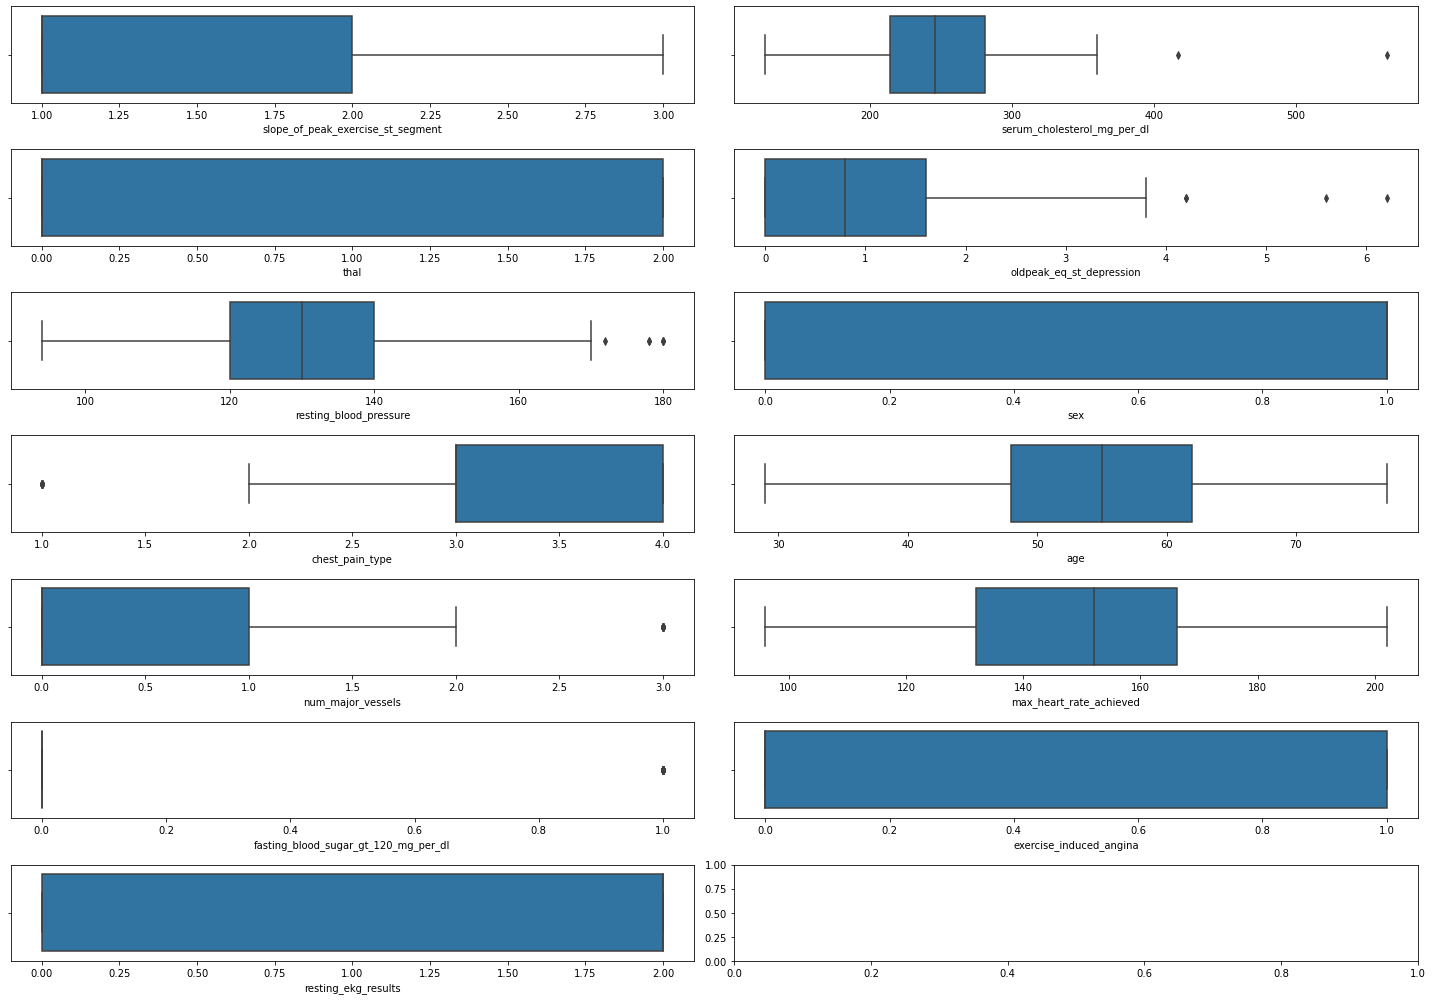

In [48]:
fig, ax = plt.subplots(7,2, figsize = (20,14))
sns.boxplot(df['slope_of_peak_exercise_st_segment'], ax = ax[0,0])
sns.boxplot(df['thal'], ax = ax[1,0])
sns.boxplot(df['resting_blood_pressure'], ax = ax[2,0])
sns.boxplot(df['chest_pain_type'], ax = ax[3,0])
sns.boxplot(df['num_major_vessels'], ax = ax[4,0])
sns.boxplot(df['fasting_blood_sugar_gt_120_mg_per_dl'], ax = ax[5,0])
sns.boxplot(df['resting_ekg_results'], ax = ax[6,0])
sns.boxplot(df['serum_cholesterol_mg_per_dl'], ax = ax[0,1])
sns.boxplot(df['oldpeak_eq_st_depression'], ax = ax[1,1])
sns.boxplot(df['sex'], ax = ax[2,1])
sns.boxplot(df['age'], ax = ax[3,1])
sns.boxplot(df['max_heart_rate_achieved'], ax = ax[4,1])
sns.boxplot(df['exercise_induced_angina'], ax = ax[5,1])
plt.tight_layout()

In [49]:
q3_serum = float(df['serum_cholesterol_mg_per_dl'].quantile(.75)) + 1.5*(df['serum_cholesterol_mg_per_dl'].quantile(.75)-df['serum_cholesterol_mg_per_dl'].quantile(.25))
q3_oldpeak = float(df['oldpeak_eq_st_depression'].quantile(.75)) + 1.5*(float(df['oldpeak_eq_st_depression'].quantile(.75))-float(df['oldpeak_eq_st_depression'].quantile(.25)))
q3_resting = float(df['resting_ekg_results'].quantile(.75)) + 1.5*(df['resting_ekg_results'].quantile(.75)-df['resting_ekg_results'].quantile(.25))


### Removal of outliers

In [50]:
df = df[df['serum_cholesterol_mg_per_dl'] < q3_serum]
df = df[df['oldpeak_eq_st_depression'] < q3_oldpeak]
df = df[df['resting_ekg_results'] < q3_resting]

#### Acquire training and testing data
* with Application of SMOTE over training data only

In [51]:
X= df.iloc[:,1:-1]
y = df.iloc[:,-1:]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from imblearn.over_sampling import SMOTE
oversampling =  SMOTE(random_state=4)
X_train_over , y_train_over  = oversampling.fit_resample(X_train, y_train)


In [52]:
print(y_train_over.value_counts())
print(y_test.value_counts())

heart_disease_present
0                        80
1                        80
dtype: int64
heart_disease_present
1                        18
0                        17
dtype: int64


### Model building (Without Outliers)
* Logistic Regression
* Random Forest
* Gradient Boosting
* XGB
* KNN - performs poorly, so the team decided to remove 
* SVM - took too much time to train/fit
* Stacking Classifier 

## Logistic Regression

In [53]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, recall_score,f1_score,precision_score
from sklearn.feature_selection import RFE
lr_model = LogisticRegression(C=0.1, solver='liblinear', random_state= 0)

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
parameters = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'sag'],
              'penalty':['none', 'l1', 'l2', 'elasticnet'],
              'C' : [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]
             }  

#grid = GridSearchCV(rf_model,parameters,cv=5,verbose=2)
lr_grid = RandomizedSearchCV(lr_model,parameters,cv=5)
lr_grid.fit(X_train_over,y_train_over)
print(lr_grid.best_estimator_)
print(lr_grid.best_score_)


LogisticRegression(C=50, random_state=0)
0.78125


In [84]:
lr_rfe = RFE(lr_model, n_features_to_select = 10)
fit = lr_rfe.fit(X_train_over, y_train_over)
print("Feature Ranking: %s" % (fit.ranking_))
#'slope_of_peak_exercise_st_segment','thal','resting_blood_pressure','chest_pain_type','num_major_vessels','fasting_blood_sugar_gt_120_mg_per_dl','resting_ekg_results','serum_cholesterol_mg_per_dl','oldpeak_eq_st_depression','sex','age','max_heart_rate_achieved','exercise_induced_angina'


Feature Ranking: [1 1 4 1 1 1 1 3 1 1 2 1 1]


In [55]:
for i in range(2, 14):
    lr_rfe = RFE(lr_model, i)
    fit = lr_rfe.fit(X_train_over, y_train_over)
    X_train_selected = lr_rfe.transform(X_train_over)
    X_test_selected = lr_rfe.transform(X_test)
    lr_model.fit(X_train_selected,y_train_over)
    preds_lr1 = lr_model.predict(X_train_selected)
    print("Number of features selected:", i)
    print('The Accuracy for Training Phase:', accuracy_score(y_train_over, preds_lr1))
    print('The Average Precision for Training Phase:', precision_score(y_train_over, preds_lr1))
    print('The Average Recall for Training Phase:',recall_score(y_train_over, preds_lr1))
    print('The Average F1 for Training Phase:',f1_score(y_train_over, preds_lr1))

Number of features selected: 2
The Accuracy for Training Phase: 0.775
The Average Precision for Training Phase: 0.7444444444444445
The Average Recall for Training Phase: 0.8375
The Average F1 for Training Phase: 0.788235294117647
Number of features selected: 3
The Accuracy for Training Phase: 0.7875
The Average Precision for Training Phase: 0.7738095238095238
The Average Recall for Training Phase: 0.8125
The Average F1 for Training Phase: 0.7926829268292684
Number of features selected: 4
The Accuracy for Training Phase: 0.8
The Average Precision for Training Phase: 0.7790697674418605
The Average Recall for Training Phase: 0.8375
The Average F1 for Training Phase: 0.8072289156626506
Number of features selected: 5
The Accuracy for Training Phase: 0.7875
The Average Precision for Training Phase: 0.7674418604651163
The Average Recall for Training Phase: 0.825
The Average F1 for Training Phase: 0.7951807228915662
Number of features selected: 6
The Accuracy for Training Phase: 0.79375
The Av

In [56]:
lr_rfe = RFE(lr_model, n_features_to_select = 10)
fit = lr_rfe.fit(X_train_over, y_train_over)
X_test_selected = lr_rfe.transform(X_test)
X_train_selected = lr_rfe.transform(X_train_over)
X_selected = lr_rfe.transform(X)
lr_model.fit(X_train_selected,y_train_over)

preds_lr = lr_model.predict(X_test_selected)

print('TRAINING METRICS')
print('The Accuracy for Training Phase:', accuracy_score(y_train_over,lr_model.predict(X_train_selected)))
print('The Precision for Training Phase:', precision_score(y_train_over, lr_model.predict(X_train_selected)))
print('The Recall for Training Phase:',recall_score(y_train_over, lr_model.predict(X_train_selected)))
print('The F1 for Training Phase:',f1_score(y_train_over, lr_model.predict(X_train_selected)))

print('TESTING METRICS')
print('The Accuracy for Testing Phase:', accuracy_score(y_test, preds_lr))
print('The Average Precision for Testing Phase:', precision_score(y_test, preds_lr))
print('The Average Recall for Testing Phase:',recall_score(y_test, preds_lr))
print('The Average F1 for Testing Phase:',f1_score(y_test, preds_lr))
pd.crosstab(y_test.values.ravel(),preds_lr)

TRAINING METRICS
The Accuracy for Training Phase: 0.84375
The Precision for Training Phase: 0.8666666666666667
The Recall for Training Phase: 0.8125
The F1 for Training Phase: 0.8387096774193549
TESTING METRICS
The Accuracy for Testing Phase: 0.9142857142857143
The Average Precision for Testing Phase: 0.8947368421052632
The Average Recall for Testing Phase: 0.9444444444444444
The Average F1 for Testing Phase: 0.918918918918919


col_0,0,1
row_0,,
0,15,2
1,1,17


In [57]:
#For Generalization
lr_rfe = RFE(lr_model, n_features_to_select = 10)
fit = lr_rfe.fit(X_train_over, y_train_over)
X_test_selected1 = lr_rfe.transform(X_test)
X_train_selected1 = lr_rfe.transform(X_train_over)
X_selected1 = lr_rfe.transform(X)
lr_model.fit(X_train_selected1,y_train_over)
scores6 = cross_validate(lr_model,X_selected1,y,cv=3,scoring=['accuracy','f1','precision', 'recall'], return_train_score=True)
print('TESTING METRICS')
print('The Average Accuracy for Testing Phase:',scores6['test_accuracy'].mean())
print('The Accuracy STD for Testing Phase:',scores6['test_accuracy'].std())
print('The Average Precision for Testing Phase:',scores6['test_precision'].mean())
print('The Precision STD for Testing Phase:',scores6['test_precision'].std())
print('The Average Recall for Testing Phase:',scores6['test_recall'].mean())
print('The Recall STD for Testing Phase:',scores6['test_recall'].std())
print('The Average F1 for Testing Phase:',scores6['test_f1'].mean())
print('The F1 STD for Testing Phase:',scores6['test_f1'].std())
print(" ")

TESTING METRICS
The Average Accuracy for Testing Phase: 0.8333333333333334
The Accuracy STD for Testing Phase: 0.03542766668372973
The Average Precision for Testing Phase: 0.8386064877292947
The Precision STD for Testing Phase: 0.05208661590817603
The Average Recall for Testing Phase: 0.777948717948718
The Recall STD for Testing Phase: 0.08376103261744895
The Average F1 for Testing Phase: 0.8032941900866429
The F1 STD for Testing Phase: 0.0457228378204873
 


## RandomForestClassifier

In [58]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(max_depth=4,
                       n_estimators=200,random_state= 0)

parameters = {'max_depth':[2,4,6,8],
              'n_estimators':[30,40,50,100,200],
              'max_features' : [7,8,9,10,11,12,13],
              'oob_score': ['True', 'False'],
              'bootstrap':['True', 'False'],
             }  

#grid = GridSearchCV(rf_model,parameters,cv=5,verbose=2)
rf_grid = RandomizedSearchCV(rf_model,parameters,cv=5)
rf_grid.fit(X_train_over,y_train_over)
print(rf_grid.best_estimator_)
print(rf_grid.best_score_)

RandomForestClassifier(bootstrap='False', max_depth=6, max_features=8,
                       n_estimators=200, oob_score='True', random_state=0)
0.80625


In [59]:
rf_rfe = RFE(rf_model, n_features_to_select = 8)
fit = rf_rfe.fit(X_train_over, y_train_over)
print("Feature Ranking: %s" % (fit.ranking_))
#'slope_of_peak_exercise_st_segment','thal','resting_blood_pressure','chest_pain_type','num_major_vessels','fasting_blood_sugar_gt_120_mg_per_dl','resting_ekg_results','serum_cholesterol_mg_per_dl','oldpeak_eq_st_depression','sex','age','max_heart_rate_achieved','exercise_induced_angina'



Feature Ranking: [4 1 1 1 1 6 5 1 1 3 1 1 2]


In [60]:
for i in range(2, 14):
    rf_rfe = RFE(rf_model, i)
    fit = rf_rfe.fit(X_train_over, y_train_over)
    X_train_selected = rf_rfe.transform(X_train_over)
    X_test_selected = rf_rfe.transform(X_test)
    rf_model.fit(X_train_selected,y_train_over)
    preds_rf1 = rf_model.predict(X_train_selected)
    print("Number of features selected:", i)
    print('The Accuracy for Training Phase:', accuracy_score(y_train_over, preds_rf1))
    print('The Average Precision for Training Phase:', precision_score(y_train_over, preds_rf1))
    print('The Average Recall for Training Phase:',recall_score(y_train_over, preds_rf1))
    print('The Average F1 for Training Phase:',f1_score(y_train_over, preds_rf1))

Number of features selected: 2
The Accuracy for Training Phase: 0.83125
The Average Precision for Training Phase: 0.8955223880597015
The Average Recall for Training Phase: 0.75
The Average F1 for Training Phase: 0.816326530612245
Number of features selected: 3
The Accuracy for Training Phase: 0.86875
The Average Precision for Training Phase: 0.9154929577464789
The Average Recall for Training Phase: 0.8125
The Average F1 for Training Phase: 0.8609271523178808
Number of features selected: 4
The Accuracy for Training Phase: 0.8875
The Average Precision for Training Phase: 0.918918918918919
The Average Recall for Training Phase: 0.85
The Average F1 for Training Phase: 0.8831168831168831
Number of features selected: 5
The Accuracy for Training Phase: 0.90625
The Average Precision for Training Phase: 0.9113924050632911
The Average Recall for Training Phase: 0.9
The Average F1 for Training Phase: 0.9056603773584907
Number of features selected: 6
The Accuracy for Training Phase: 0.91875
The Av

In [61]:
rf_rfe = RFE(rf_model, n_features_to_select =8)
fit = rf_rfe.fit(X_train_over, y_train_over)
X_test_selected = rf_rfe.transform(X_test)
X_train_selected = rf_rfe.transform(X_train_over)
X_selected = rf_rfe.transform(X)
rf_model.fit(X_train_selected,y_train_over)

preds_rf = rf_model.predict(X_test_selected)

print('TRAINING METRICS')
print('The Accuracy for Training Phase:', accuracy_score(y_train_over, rf_model.predict(X_train_selected)))
print('The Precision for Training Phase:', precision_score(y_train_over, rf_model.predict(X_train_selected)))
print('The Recall for Training Phase:',recall_score(y_train_over, rf_model.predict(X_train_selected)))
print('The F1 for Training Phase:',f1_score(y_train_over, rf_model.predict(X_train_selected)))

print('TESTING METRICS')
print('The Accuracy for Testing Phase:', accuracy_score(y_test, preds_rf))
print('The Average Precision for Testing Phase:', precision_score(y_test, preds_rf))
print('The Average Recall for Testing Phase:',recall_score(y_test, preds_rf))
print('The Average F1 for Testing Phase:',f1_score(y_test, preds_rf))
pd.crosstab(y_test.values.ravel(),preds_rf)

TRAINING METRICS
The Accuracy for Training Phase: 0.925
The Precision for Training Phase: 0.9473684210526315
The Recall for Training Phase: 0.9
The F1 for Training Phase: 0.9230769230769231
TESTING METRICS
The Accuracy for Testing Phase: 0.8857142857142857
The Average Precision for Testing Phase: 0.85
The Average Recall for Testing Phase: 0.9444444444444444
The Average F1 for Testing Phase: 0.8947368421052632


col_0,0,1
row_0,,
0,14,3
1,1,17


In [62]:
#For Generalization
rf_rfe = RFE(rf_model, n_features_to_select = 8)
fit = rf_rfe.fit(X_train_over, y_train_over)
X_test_selected2 = rf_rfe.transform(X_test)
X_train_selected2 = rf_rfe.transform(X_train_over)
X_selected2 = rf_rfe.transform(X)
rf_model.fit(X_train_selected2,y_train_over)
scores7 = cross_validate(rf_model,X_selected2,y,cv=3,scoring=['accuracy','f1','precision', 'recall'], return_train_score=True)
print('TESTING METRICS')
print('The Average Accuracy for Testing Phase:',scores7['test_accuracy'].mean())
print('The Accuracy STD for Testing Phase:',scores7['test_accuracy'].std())
print('The Average Precision for Testing Phase:',scores7['test_precision'].mean())
print('The Precision STD for Testing Phase:',scores7['test_precision'].std())
print('The Average Recall for Testing Phase:',scores7['test_recall'].mean())
print('The Recall STD for Testing Phase:',scores7['test_recall'].std())
print('The Average F1 for Testing Phase:',scores7['test_f1'].mean())
print('The F1 STD for Testing Phase:',scores7['test_f1'].std())
print(" ")

TESTING METRICS
The Average Accuracy for Testing Phase: 0.7931034482758621
The Accuracy STD for Testing Phase: 0.04223258177212375
The Average Precision for Testing Phase: 0.7724242424242425
The Precision STD for Testing Phase: 0.04867576049984991
The Average Recall for Testing Phase: 0.7517948717948718
The Recall STD for Testing Phase: 0.07905091194803454
The Average F1 for Testing Phase: 0.7607194177907569
The F1 STD for Testing Phase: 0.059483994914287776
 


## GradientBoostingClassifier

In [63]:

from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(learning_rate=0.01, max_depth=4,
                           max_features='sqrt', min_samples_leaf=10,
                            random_state=0,n_estimators=200, loss = 'deviance')



parameters = {'max_depth':[2,4],
              'n_estimators':[40,50, 100, 200],
              'max_features' : ['auto', 'sqrt'],
              'min_samples_leaf' : [2,4,6],
              'learning_rate': [1,0.1, 0.01,0.001]
             }  

gb_grid = RandomizedSearchCV(gb_model,parameters,cv=5)
gb_grid.fit(X_train_over,y_train_over)
print(gb_grid.best_estimator_)
print(gb_grid.best_score_)

GradientBoostingClassifier(max_depth=4, max_features='auto', min_samples_leaf=6,
                           n_estimators=50, random_state=0)
0.79375


In [64]:
gb_rfe = RFE(gb_model, n_features_to_select = 7)
fit = gb_rfe.fit(X_train_over, y_train_over)
print("Feature Ranking: %s" % (fit.ranking_))
#'slope_of_peak_exercise_st_segment','thal','resting_blood_pressure','chest_pain_type','num_major_vessels','fasting_blood_sugar_gt_120_mg_per_dl','resting_ekg_results','serum_cholesterol_mg_per_dl','oldpeak_eq_st_depression','sex','age','max_heart_rate_achieved','exercise_induced_angina'


Feature Ranking: [5 1 3 1 1 7 6 1 1 2 1 1 4]


In [65]:
for i in range(2, 14):
    gb_rfe = RFE(gb_model, i)
    fit = gb_rfe.fit(X_train_over, y_train_over)
    X_train_selected = gb_rfe.transform(X_train_over)
    X_test_selected = gb_rfe.transform(X_test)
    gb_model.fit(X_train_selected,y_train_over)
    preds_gb = gb_model.predict(X_train_selected)
    print("Number of features selected:", i)
    print('The Accuracy for Training Phase:', accuracy_score(y_train_over, preds_gb))
    print('The Average Precision for Training Phase:', precision_score(y_train_over, preds_gb))
    print('The Average Recall for Training Phase:',recall_score(y_train_over, preds_gb))
    print('The Average F1 for Training Phase:',f1_score(y_train_over, preds_gb))

Number of features selected: 2
The Accuracy for Training Phase: 0.81875
The Average Precision for Training Phase: 0.8695652173913043
The Average Recall for Training Phase: 0.75
The Average F1 for Training Phase: 0.8053691275167786
Number of features selected: 3
The Accuracy for Training Phase: 0.85625
The Average Precision for Training Phase: 0.88
The Average Recall for Training Phase: 0.825
The Average F1 for Training Phase: 0.8516129032258064
Number of features selected: 4
The Accuracy for Training Phase: 0.8625
The Average Precision for Training Phase: 0.881578947368421
The Average Recall for Training Phase: 0.8375
The Average F1 for Training Phase: 0.8589743589743589
Number of features selected: 5
The Accuracy for Training Phase: 0.90625
The Average Precision for Training Phase: 0.9012345679012346
The Average Recall for Training Phase: 0.9125
The Average F1 for Training Phase: 0.9068322981366459
Number of features selected: 6
The Accuracy for Training Phase: 0.925
The Average Preci

In [66]:
gb_rfe = RFE(gb_model, n_features_to_select = 7)
fit = gb_rfe.fit(X_train_over, y_train_over)
X_test_selected = gb_rfe.transform(X_test)
X_train_selected = gb_rfe.transform(X_train_over)
X_selected = gb_rfe.transform(X)

gb_model.fit(X_train_selected,y_train_over)
preds_gb = gb_model.predict(X_test_selected)

print('TRAINING METRICS')
print('The Accuracy for Training Phase:', accuracy_score(y_train_over, gb_model.predict(X_train_selected)))
print('The Precision for Training Phase:', precision_score(y_train_over, gb_model.predict(X_train_selected)))
print('The Recall for Training Phase:',recall_score(y_train_over, gb_model.predict(X_train_selected)))
print('The F1 for Training Phase:',f1_score(y_train_over, gb_model.predict(X_train_selected)))

print('TESTING METRICS')
print('The Accuracy for Testing Phase:', accuracy_score(y_test, preds_gb))
print('The Average Precision for Testing Phase:', precision_score(y_test, preds_gb))
print('The Average Recall for Testing Phase:',recall_score(y_test, preds_gb))
print('The Average F1 for Testing Phase:',f1_score(y_test, preds_gb))
pd.crosstab(y_test.values.ravel(),preds_gb)

TRAINING METRICS
The Accuracy for Training Phase: 0.91875
The Precision for Training Phase: 0.9466666666666667
The Recall for Training Phase: 0.8875
The F1 for Training Phase: 0.9161290322580645
TESTING METRICS
The Accuracy for Testing Phase: 0.8571428571428571
The Average Precision for Testing Phase: 0.8421052631578947
The Average Recall for Testing Phase: 0.8888888888888888
The Average F1 for Testing Phase: 0.8648648648648649


col_0,0,1
row_0,,
0,14,3
1,2,16


In [67]:
gb_rfe = RFE(gb_model, n_features_to_select = 7)
fit = gb_rfe.fit(X_train_over, y_train_over)
X_test_selected3 = gb_rfe.transform(X_test)
X_train_selected3 = gb_rfe.transform(X_train_over)
X_selected3 = gb_rfe.transform(X)

gb_model.fit(X_train_selected3,y_train_over)
preds_gb = gb_model.predict(X_test_selected3)
scores8 = cross_validate(gb_model,X_selected3,y,cv=3,scoring=['accuracy','f1','precision', 'recall'], return_train_score=True)
print('TESTING METRICS')
print('The Average Accuracy for Testing Phase:',scores8['test_accuracy'].mean())
print('The Accuracy STD for Testing Phase:',scores8['test_accuracy'].std())
print('The Average Precision for Testing Phase:',scores8['test_precision'].mean())
print('The Precision STD for Testing Phase:',scores8['test_precision'].std())
print('The Average Recall for Testing Phase:',scores8['test_recall'].mean())
print('The Recall STD for Testing Phase:',scores8['test_recall'].std())
print('The Average F1 for Testing Phase:',scores8['test_f1'].mean())
print('The F1 STD for Testing Phase:',scores8['test_f1'].std())
print(" ")

TESTING METRICS
The Average Accuracy for Testing Phase: 0.7988505747126436
The Accuracy STD for Testing Phase: 0.032510656606278054
The Average Precision for Testing Phase: 0.7844893378226713
The Precision STD for Testing Phase: 0.041367134850873295
The Average Recall for Testing Phase: 0.7523076923076922
The Recall STD for Testing Phase: 0.05348597486167146
The Average F1 for Testing Phase: 0.7672168827386434
The F1 STD for Testing Phase: 0.041820628031648176
 


## XGBClassifier

In [68]:
import xgboost as xgb
from xgboost import XGBClassifier
xgb_model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=1, max_delta_step=0,
              max_depth=2, min_child_weight=3, 
              monotone_constraints='()', n_estimators=200, n_jobs=16,
              num_parallel_tree=1, random_state=0, reg_alpha=.6, reg_lambda=.6,
              scale_pos_weight=1, subsample=0.7, tree_method='exact',
              validate_parameters=1, verbosity=None)


parameters = {'learning_rate': [0.01, 0.1],
              'max_depth':[2,4,6,8],
              'min_child_weight': [1, 3, 5],
              'subsample': [0.5, 0.7],
              'colsample_bytree': [0.5, 0.7],
              'n_estimators' : [30,40,50,100,200],
              'reg_alpha':[0.5,0.6,0.7,0.8,1],
              'reg_lambda':[0.5,0.6,0.7,0.8,1],
              'objective': ['binary:logistic']
             }  

xgb_grid = RandomizedSearchCV(xgb_model,parameters,cv=5)
xgb_grid.fit(X_train_over,y_train_over)
print(xgb_grid.best_estimator_)
print(xgb_grid.best_score_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=40, n_jobs=16,
              num_parallel_tree=1, random_state=0, reg_alpha=0.8,
              reg_lambda=0.5, scale_pos_weight=1, subsample=0.7,
              tree_method='exact', validate_parameters=1, verbosity=None)
0.79375


In [69]:
xgb_rfe = RFE(xgb_model, n_features_to_select = 5)
fit = xgb_rfe.fit(X_train_over, y_train_over)
print("Feature Ranking: %s" % (fit.ranking_))
#'slope_of_peak_exercise_st_segment','thal','resting_blood_pressure','chest_pain_type', ,'num_major_vessels','fasting_blood_sugar_gt_120_mg_per_dl','resting_ekg_results','serum_cholesterol_mg_per_dl','oldpeak_eq_st_depression','sex','age','max_heart_rate_achieved','exercise_induced_angina'


Feature Ranking: [8 1 5 1 7 9 2 4 1 1 1 3 6]


In [70]:
for i in range(2, 14):
    xgb_rfe = RFE(xgb_model, i)
    fit = xgb_rfe.fit(X_train_over, y_train_over)
    X_train_selected = xgb_rfe.transform(X_train_over)
    X_test_selected = xgb_rfe.transform(X_test)
    xgb_model.fit(X_train_selected,y_train_over)
    preds_xgb = xgb_model.predict(X_train_selected)
    print("Number of features selected:", i)
    print('The Accuracy for Testing Phase:', accuracy_score(y_train_over, preds_xgb))
    print('The Average Precision for Testing Phase:', precision_score(y_train_over, preds_xgb))
    print('The Average Recall for Testing Phase:',recall_score(y_train_over, preds_xgb))
    print('The Average F1 for Testing Phase:',f1_score(y_train_over, preds_xgb))

Number of features selected: 2
The Accuracy for Testing Phase: 0.8125
The Average Precision for Testing Phase: 0.8378378378378378
The Average Recall for Testing Phase: 0.775
The Average F1 for Testing Phase: 0.8051948051948051
Number of features selected: 3
The Accuracy for Testing Phase: 0.81875
The Average Precision for Testing Phase: 0.8695652173913043
The Average Recall for Testing Phase: 0.75
The Average F1 for Testing Phase: 0.8053691275167786
Number of features selected: 4
The Accuracy for Testing Phase: 0.8875
The Average Precision for Testing Phase: 0.9078947368421053
The Average Recall for Testing Phase: 0.8625
The Average F1 for Testing Phase: 0.8846153846153847
Number of features selected: 5
The Accuracy for Testing Phase: 0.93125
The Average Precision for Testing Phase: 0.96
The Average Recall for Testing Phase: 0.9
The Average F1 for Testing Phase: 0.9290322580645162
Number of features selected: 6
The Accuracy for Testing Phase: 0.9375
The Average Precision for Testing Ph

In [71]:
xgb_rfe = RFE(xgb_model, n_features_to_select = 5)
fit = xgb_rfe.fit(X_train_over, y_train_over)
X_test_selected = xgb_rfe.transform(X_test)
X_train_selected = xgb_rfe.transform(X_train_over)
X_selected = xgb_rfe.transform(X)

xgb_model.fit(X_train_selected1,y_train_over)

preds_xgb = xgb_model.predict(X_test_selected1)

print('TRAINING METRICS')
print('The Accuracy for Training Phase:', accuracy_score(y_train_over, xgb_model.predict(X_train_selected1)))
print('The Precision for Training Phase:', precision_score(y_train_over, xgb_model.predict(X_train_selected1)))
print('The Recall for Training Phase:',recall_score(y_train_over, xgb_model.predict(X_train_selected1)))
print('The F1 for Training Phase:',f1_score(y_train_over, xgb_model.predict(X_train_selected1)))

print('TESTING METRICS')
print('The Accuracy for Testing Phase:', accuracy_score(y_test, preds_xgb))
print('The Average Precision for Testing Phase:', precision_score(y_test, preds_xgb))
print('The Average Recall for Testing Phase:',recall_score(y_test, preds_xgb))
print('The Average F1 for Testing Phase:',f1_score(y_test, preds_xgb))
pd.crosstab(y_test.values.ravel(),preds_xgb)

TRAINING METRICS
The Accuracy for Training Phase: 0.93125
The Precision for Training Phase: 0.9259259259259259
The Recall for Training Phase: 0.9375
The F1 for Training Phase: 0.9316770186335404
TESTING METRICS
The Accuracy for Testing Phase: 0.8571428571428571
The Average Precision for Testing Phase: 0.8421052631578947
The Average Recall for Testing Phase: 0.8888888888888888
The Average F1 for Testing Phase: 0.8648648648648649


col_0,0,1
row_0,,
0,14,3
1,2,16


In [72]:
xgb_rfe = RFE(xgb_model, n_features_to_select = 5)
fit = xgb_rfe.fit(X_train_over, y_train_over)
X_test_selected4 = xgb_rfe.transform(X_test)
X_train_selected4 = xgb_rfe.transform(X_train_over)
X_selected4 = xgb_rfe.transform(X)
scores9 = cross_validate(xgb_model,X_selected4,y,cv=3,scoring=['accuracy','f1','precision', 'recall'], return_train_score=True)
print('TESTING METRICS')
print('The Average Accuracy for Testing Phase:',scores9['test_accuracy'].mean())
print('The Accuracy STD for Testing Phase:',scores9['test_accuracy'].std())
print('The Average Precision for Testing Phase:',scores9['test_precision'].mean())
print('The Precision STD for Testing Phase:',scores9['test_precision'].std())
print('The Average Recall for Testing Phase:',scores9['test_recall'].mean())
print('The Recall STD for Testing Phase:',scores9['test_recall'].std())
print('The Average F1 for Testing Phase:',scores9['test_f1'].mean())
print('The F1 STD for Testing Phase:',scores9['test_f1'].std())
print(" ")

TESTING METRICS
The Average Accuracy for Testing Phase: 0.8045977011494253
The Accuracy STD for Testing Phase: 0.056893649060986554
The Average Precision for Testing Phase: 0.7964113181504485
The Precision STD for Testing Phase: 0.10100936060697109
The Average Recall for Testing Phase: 0.777948717948718
The Recall STD for Testing Phase: 0.07101777240501245
The Average F1 for Testing Phase: 0.7806786679299575
The F1 STD for Testing Phase: 0.054136099778318084
 


### Stacking of Different Models

In [73]:
from mlxtend.classifier import StackingClassifier

stack_model = StackingClassifier(
    classifiers=[
        lr_model,
        rf_model
    ],
    use_probas=True,
    meta_classifier=lr_model,average_probas=True
)

# Check which model is better for generalization, gb_model or rf_model

### Purpose: Checking the features for each model created
* X_train_selected1 - Logistic Regression 
* X_train_selected2 - Random Forest
* X_train_selected3 - Gradient Boosting
* X_train_selected4 - XGB


In [74]:
print(X_train_selected1.shape)
print(X_train_selected2.shape)
print(X_train_selected3.shape)
print(X_train_selected4.shape)

(160, 10)
(160, 8)
(160, 7)
(160, 5)


### The features of Gradient Boosting works the best in training the Stacking Classifier

In [75]:

stack_model.fit(X_train_selected3,y_train_over)

preds_stack = stack_model.predict(X_test_selected3)

print('TRAINING METRICS')
print('The Accuracy for Training Phase:', accuracy_score(y_train_over, stack_model.predict(X_train_selected3)))
print('The Precision for Training Phase:', precision_score(y_train_over, stack_model.predict(X_train_selected3)))
print('The Recall for Training Phase:',recall_score(y_train_over, stack_model.predict(X_train_selected3)))
print('The F1 for Training Phase:',f1_score(y_train_over, stack_model.predict(X_train_selected3)))

print('TESTING METRICS')
print('The Accuracy for Testing Phase:', accuracy_score(y_test, preds_stack))
print('The Average Precision for Testing Phase:', precision_score(y_test, preds_stack))
print('The Average Recall for Testing Phase:',recall_score(y_test, preds_stack))
print('The Average F1 for Testing Phase:',f1_score(y_test, preds_stack))
pd.crosstab(y_test.values.ravel(),preds_stack)

TRAINING METRICS
The Accuracy for Training Phase: 0.86875
The Precision for Training Phase: 0.9041095890410958
The Recall for Training Phase: 0.825
The F1 for Training Phase: 0.8627450980392157
TESTING METRICS
The Accuracy for Testing Phase: 0.9428571428571428
The Average Precision for Testing Phase: 0.9444444444444444
The Average Recall for Testing Phase: 0.9444444444444444
The Average F1 for Testing Phase: 0.9444444444444444


col_0,0,1
row_0,,
0,16,1
1,1,17


In [76]:
scores10 = cross_validate(stack_model,X_selected3,y,cv=3,scoring=['accuracy','f1','precision', 'recall'], return_train_score=True)
print('TESTING METRICS')
print('The Average Accuracy for Testing Phase:',scores10['test_accuracy'].mean())
print('The Accuracy STD for Testing Phase:',scores10['test_accuracy'].std())
print('The Average Precision for Testing Phase:',scores10['test_precision'].mean())
print('The Precision STD for Testing Phase:',scores10['test_precision'].std())
print('The Average Recall for Testing Phase:',scores10['test_recall'].mean())
print('The Recall STD for Testing Phase:',scores10['test_recall'].std())
print('The Average F1 for Testing Phase:',scores10['test_f1'].mean())
print('The F1 STD for Testing Phase:',scores10['test_f1'].std())
print(" ")

TESTING METRICS
The Average Accuracy for Testing Phase: 0.8333333333333334
The Accuracy STD for Testing Phase: 0.029304709848234366
The Average Precision for Testing Phase: 0.8637320574162679
The Precision STD for Testing Phase: 0.03208506508406021
The Average Recall for Testing Phase: 0.7389743589743589
The Recall STD for Testing Phase: 0.0717252409592609
The Average F1 for Testing Phase: 0.7947118241235888
The F1 STD for Testing Phase: 0.04785431403454911
 


In [77]:
print('TRAINING METRICS')
print('The Average Accuracy for Training Phase:',scores10['train_accuracy'].mean())
print('The Accuracy STD for Training Phase:',scores10['train_accuracy'].std())
print('The Average Precision for Training Phase:',scores10['train_precision'].mean())
print('The Precision STD for Training Phase:',scores10['train_precision'].std())
print('The Average Recall for Training Phase:',scores10['train_recall'].mean())
print('The Recall STD for Training Phase:',scores10['train_recall'].std())
print('The Average F1 for Training Phase:',scores10['train_f1'].mean())
print('The F1 STD for Training Phase:',scores10['train_f1'].std())
print(" ")

TRAINING METRICS
The Average Accuracy for Training Phase: 0.882183908045977
The Accuracy STD for Training Phase: 0.026648329010045112
The Average Precision for Training Phase: 0.938798372840926
The Precision STD for Training Phase: 0.017352505339000745
The Average Recall for Training Phase: 0.7854449472096531
The Recall STD for Training Phase: 0.0704358177507051
The Average F1 for Training Phase: 0.8532011680023462
The F1 STD for Training Phase: 0.04099972351036745
 


## Model Evaluation Compilation (WITH OUTLIERS)
* Method of comparison is the Generalization of Cross Validation to check whether a model works better with differet folds of the data set

In [78]:
average_acc = [scores1['test_accuracy'].mean(), scores2['test_accuracy'].mean(),scores3['test_accuracy'].mean(),scores4['test_accuracy'].mean(),scores5['test_accuracy'].mean()]
average_acc_ = [scores1['train_accuracy'].mean(), scores2['train_accuracy'].mean(),scores3['train_accuracy'].mean(),scores4['train_accuracy'].mean(),scores5['train_accuracy'].mean()]

std_acc = [scores1['test_accuracy'].std(), scores2['test_accuracy'].std(), scores3['test_accuracy'].std(),scores4['test_accuracy'].std(), scores5['test_accuracy'].std()]
std_acc_ = [scores1['train_accuracy'].std(), scores2['train_accuracy'].std(), scores3['train_accuracy'].std(),scores4['train_accuracy'].std(), scores5['train_accuracy'].std()]

average_pre = [scores1['test_precision'].mean(),scores2['test_precision'].mean(),scores3['test_precision'].mean(),scores4['test_precision'].mean(),scores5['test_precision'].mean()]
average_pre_ = [scores1['train_precision'].mean(),scores2['train_precision'].mean(),scores3['train_precision'].mean(),scores4['train_precision'].mean(),scores5['train_precision'].mean()]

               
std_pre = [scores1['test_precision'].std(),scores2['test_precision'].std(),scores3['test_precision'].std(),scores4['test_precision'].std(),scores5['test_precision'].std()]
std_pre_ = [scores1['train_precision'].std(),scores2['train_precision'].std(),scores3['train_precision'].std(),scores4['train_precision'].std(),scores5['train_precision'].std()]
                
                
average_rec = [scores1['test_recall'].mean(),scores2['test_recall'].mean(),scores3['test_recall'].mean(),scores4['test_recall'].mean(),scores5['test_recall'].mean()]
average_rec_ = [scores1['train_recall'].mean(),scores2['train_recall'].mean(),scores3['train_recall'].mean(),scores4['train_recall'].mean(),scores5['train_recall'].mean()]
                
                
std_rec = [scores1['test_recall'].std(),scores2['test_recall'].std(),scores3['test_recall'].std(),scores4['test_recall'].std(),scores5['test_recall'].std()]
std_rec_ = [scores1['train_recall'].std(),scores2['train_recall'].std(),scores3['train_recall'].std(),scores4['train_recall'].std(),scores5['train_recall'].std()]
                
                
average_f1 = [scores1['test_f1'].mean(),scores2['test_f1'].mean(),scores3['test_f1'].mean(),scores4['test_f1'].mean(),scores5['test_f1'].mean()]
average_f1_ = [scores1['train_f1'].mean(),scores2['train_f1'].mean(),scores3['train_f1'].mean(),scores4['train_f1'].mean(),scores5['train_f1'].mean()]
                
                
std_f1 = [scores1['test_f1'].std(),scores2['test_f1'].std(),scores3['test_f1'].std(),scores4['test_f1'].std(),scores5['test_f1'].std()]
std_f1_ = [scores1['train_f1'].std(),scores2['train_f1'].std(),scores3['train_f1'].std(),scores4['train_f1'].std(),scores5['train_f1'].std()]
                
                
data_scores = np.array([average_acc_,average_acc,std_acc_,std_acc,average_pre_,average_pre,std_pre_,std_pre,average_rec_,average_rec,std_rec_,std_rec,average_f1_,average_f1,std_f1_,std_f1])

In [79]:
with_outliers = pd.DataFrame(data = data_scores,index = ['Train Average Accuracy','Test Average Accuracy', 'Train STD Accuracy','Test STD Accuracy', 'Train Average Precision','Test Average Precision', 'Train STD Precision','Test STD Precision', 'Train Average Recall','Test Average Recall', 'Train STD Recall', 'Test STD Recall','Train Average F1', 'Test Average F1', 'Train STD F1','Test STD F1'], columns = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'XGB', 'Stacking Classifier'])


## Model Evaluation Compilation (WITHOUT OUTLIERS)

In [80]:
average_acc1= [scores6['test_accuracy'].mean(), scores7['test_accuracy'].mean(),scores8['test_accuracy'].mean(),scores9['test_accuracy'].mean(),scores10['test_accuracy'].mean()]
average_acc_1 = [scores6['train_accuracy'].mean(), scores7['train_accuracy'].mean(),scores8['train_accuracy'].mean(),scores9['train_accuracy'].mean(),scores10['train_accuracy'].mean()]

std_acc1 = [scores6['test_accuracy'].std(), scores7['test_accuracy'].std(), scores8['test_accuracy'].std(),scores9['test_accuracy'].std(), scores10['test_accuracy'].std()]
std_acc_1 = [scores6['train_accuracy'].std(), scores7['train_accuracy'].std(), scores8['train_accuracy'].std(),scores9['train_accuracy'].std(), scores10['train_accuracy'].std()]

average_pre1 = [scores6['test_precision'].mean(),scores7['test_precision'].mean(),scores8['test_precision'].mean(),scores9['test_precision'].mean(),scores10['test_precision'].mean()]
average_pre_1 = [scores6['train_precision'].mean(),scores7['train_precision'].mean(),scores8['train_precision'].mean(),scores9['train_precision'].mean(),scores10['train_precision'].mean()]

               
std_pre1 = [scores6['test_precision'].std(),scores7['test_precision'].std(),scores8['test_precision'].std(),scores9['test_precision'].std(),scores10['test_precision'].std()]
std_pre_1 = [scores6['train_precision'].std(),scores7['train_precision'].std(),scores8['train_precision'].std(),scores9['train_precision'].std(),scores10['train_precision'].std()]
                
                
average_rec1 = [scores6['test_recall'].mean(),scores7['test_recall'].mean(),scores8['test_recall'].mean(),scores9['test_recall'].mean(),scores10['test_recall'].mean()]
average_rec_1 = [scores6['train_recall'].mean(),scores7['train_recall'].mean(),scores8['train_recall'].mean(),scores9['train_recall'].mean(),scores10['train_recall'].mean()]
                
                
std_rec1 = [scores6['test_recall'].std(),scores7['test_recall'].std(),scores8['test_recall'].std(),scores9['test_recall'].std(),scores10['test_recall'].std()]
std_rec_1 = [scores6['train_recall'].std(),scores7['train_recall'].std(),scores8['train_recall'].std(),scores9['train_recall'].std(),scores10['train_recall'].std()]
                
                
average_f11 = [scores6['test_f1'].mean(),scores7['test_f1'].mean(),scores8['test_f1'].mean(),scores9['test_f1'].mean(),scores10['test_f1'].mean()]
average_f1_1 = [scores6['train_f1'].mean(),scores7['train_f1'].mean(),scores8['train_f1'].mean(),scores9['train_f1'].mean(),scores10['train_f1'].mean()]
                
                
std_f11 = [scores6['test_f1'].std(),scores7['test_f1'].std(),scores8['test_f1'].std(),scores9['test_f1'].std(),scores10['test_f1'].std()]
std_f1_1 = [scores6['train_f1'].std(),scores7['train_f1'].std(),scores8['train_f1'].std(),scores9['train_f1'].std(),scores10['train_f1'].std()]
                
                
data_scores1 = np.array([average_acc_1,average_acc1,std_acc_1,std_acc1,average_pre_1,average_pre1,std_pre_1,std_pre1,average_rec_1,average_rec1,std_rec_1,std_rec1,average_f1_1,average_f11,std_f1_1,std_f11])

In [81]:
without_outliers = pd.DataFrame(data = data_scores1,index = ['Train Average Accuracy','Test Average Accuracy', 'Train STD Accuracy','Test STD Accuracy', 'Train Average Precision','Test Average Precision', 'Train STD Precision','Test STD Precision', 'Train Average Recall','Test Average Recall', 'Train STD Recall', 'Test STD Recall','Train Average F1', 'Test Average F1', 'Train STD F1','Test STD F1'], columns = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'XGB', 'Stacking Classifier'])


In [82]:
with_outliers.to_excel('WITH OUTLIERS.xlsx')
without_outliers.to_excel('WITHOUT OUTLIERS.xlsx')

## Features selected among the all models (Part1 - With outliers)


### Features of Logistic Regression
* 'slope_of_peak_exercise_st_segment'
* 'thal'
* 'chest_pain_type'
* 'num_major_vessels'
* 'fasting_blood_sugar_gt_120_mg_per_dl'
* 'resting_ekg_results'
* 'oldpeak_eq_st_depression'
* 'sex'
* 'max_heart_rate_achieved'
* 'exercise_induced_angina'

### Features of Random Forest 
* 'thal'
* 'resting_blood_pressure'
* 'chest_pain_type'
* 'num_major_vessels'
* 'serum_cholesterol_mg_per_dl'
* 'oldpeak_eq_st_depression'
* 'age'
* 'max_heart_rate_achieved'

### Features of Gradient Boosting (Same features for Stacking Classifier)
* 'thal'
* 'chest_pain_type'
* 'num_major_vessels'
* 'serum_cholesterol_mg_per_dl'
* 'oldpeak_eq_st_depression'
* 'age'
* 'max_heart_rate_achieved'

### Features of XGB
* 'thal'
* 'chest_pain_type'
* 'num_major_vessels'
* 'sex'
* 'age'

## Features selected among the all models (Part2 - Without outliers)


### Same features were selected in Part 2 for models Logistic Regression, Random Forest, and Gradient Boosting, except XGB which is stated below


### Features of XGB
* 'thal'
* 'chest_pain_type'
* 'oldpeak_eq_st_depression'
* 'sex'
* 'age'

#### Part 1 XGB features has a little difference with the features selected which is <font color='red'>'num_major_vessels'</font>, as for Part 2 XGB it is <font color='red'>'oldpeak_eq_st_depression'</font>

### Features that are frequently selected by all the models
* <font color='blue'>'thal'</font>
* <font color='blue'>'chest_pain_type'</font>
* <font color='blue'>'num_major_vessels'</font>
* <font color='blue'>'oldpeak_eq_st_depression'</font>


## Step 9: Evaluations of the models for Part 1 and Part 2

## Model Evaluations (With Outliers)

<img src='table1.PNG' />

## Model Evaluations (Without Outliers)

<img src='table2.PNG' />

## Final Recommendation: Outcome of Part 1 and Part 2 is almost the same. 

## Stacking Classifier is the best working model across Part 1 and Part 2. The train and test evaluations are not overfitting and also has the less standard deviations with regards to "Generalization" 

### The recommendation are soley based on the evaluation of the models, however the final decision can be taken with the help of Domain Experts.